In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Number of anomaly dates: 9

Anomaly dates and review counts:


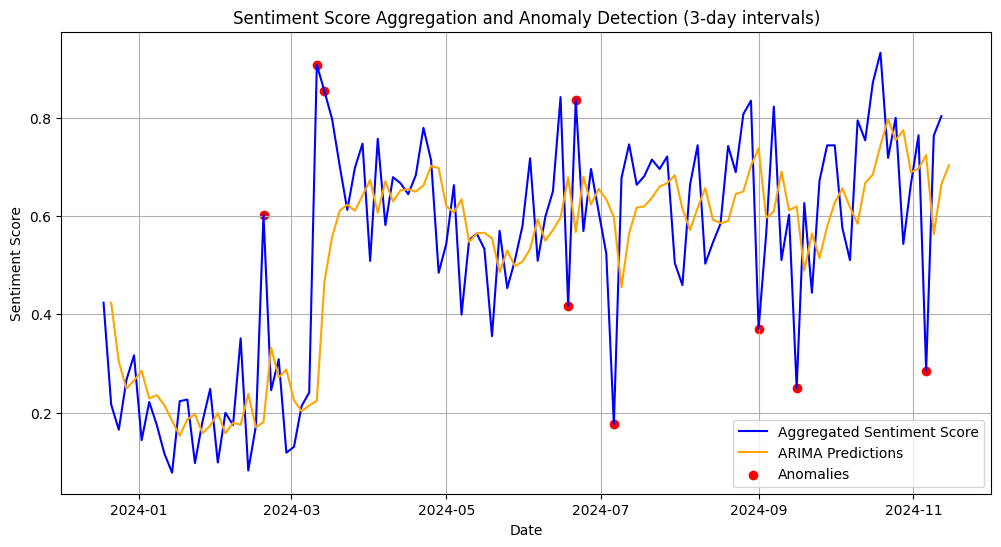

Standard deviation of average sentiment scores on anomaly dates: 0.2846177362132782


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 데이터 불러오기
file_path = "/content/drive/MyDrive/PML_PAPER/data/4_Sentiment_SuperSol.csv"  # CSV 파일 경로
df = pd.read_csv(file_path)

# 컬럼 이름 정리 및 확인
df.columns = df.columns.str.strip()

# 날짜 데이터 처리
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # 날짜 형식 변환
else:
    df['date'] = pd.date_range(start='2023-12-18', periods=len(df), freq='D')  # 날짜 생성

# 12월 18일 이후 데이터만 필터링
filter_date = pd.Timestamp('2023-12-18')
df = df[df['date'] >= filter_date]

# 날짜 순으로 정렬
df.sort_values('date', inplace=True)

# n일 단위로 sentiment_score 평균 계산
def aggregate_sentiment(data, n):
    data = data.set_index('date')  # 'date' 컬럼을 DatetimeIndex로 설정
    aggregated = data['sentiment_score'].resample(f'{n}D').mean()
    return aggregated

# n일 단위 설정 (예: 7일간 묶음)
n = 3
aggregated_scores = aggregate_sentiment(df, n)

# ARIMA 모델로 이상점 탐지
def detect_anomalies(data, order=(1, 1, 1)):
    model = ARIMA(data, order=order)
    fitted_model = model.fit()
    predictions = fitted_model.predict(start=1, end=len(data))

    # 잔차를 기반으로 이상치 판단
    residuals = data[1:] - predictions[1:]
    threshold = 1.5 * np.std(residuals)
    anomalies = residuals[abs(residuals) > threshold]
    return predictions, anomalies

predictions, anomalies = detect_anomalies(aggregated_scores)

# 이상치 날짜, 개수 및 리뷰 수 계산
anomaly_dates = anomalies.index
anomaly_review_counts = df[df['date'].isin(anomaly_dates)].groupby('date').size()

print(f"Number of anomaly dates: {len(anomaly_dates)}")
print("\nAnomaly dates and review counts:")
for date, count in anomaly_review_counts.items():
    print(f"{date.strftime('%Y-%m-%d')}: {count} reviews")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(aggregated_scores, label='Aggregated Sentiment Score', color='blue')
plt.plot(predictions, label='ARIMA Predictions', color='orange')
plt.scatter(anomalies.index, aggregated_scores[anomalies.index], color='red', label='Anomalies')
plt.title(f'Sentiment Score Aggregation and Anomaly Detection ({n}-day intervals)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid()
plt.show()

# Prepare the anomaly dates for saving to a file
anomaly_dates_list = anomaly_dates.strftime('%Y-%m-%d').tolist()

# Define file path for saving
output_file_path = "/content/drive/MyDrive/PML_PAPER/data/5_Anomaly_Dates_SuperSol.txt"

# Write the anomaly dates to the text file
with open(output_file_path, 'w') as f:
    for date in anomaly_dates_list:
        f.write(f"{date}\n")

# Return the list of anomaly dates
anomaly_dates_list

# 이상치 날짜들에 해당하는 sentiment_score 값 추출
anomaly_sentiment_scores = df[df['date'].isin(anomaly_dates)]['sentiment_score']

# 각 이상치 날짜에 해당하는 평균 sentiment_score를 구합니다.
# n일 단위로 묶어서 계산된 sentiment_score들을 사용할 수 있습니다.
anomaly_avg_sentiment_scores = aggregated_scores[anomalies.index]

# 그 평균값들의 표준 편차를 계산합니다.
std_deviation_of_anomalies = anomaly_avg_sentiment_scores.std()

# 결과 출력
print(f"Standard deviation of average sentiment scores on anomaly dates: {std_deviation_of_anomalies}")



Number of anomaly dates: 2

Anomaly dates and review counts:


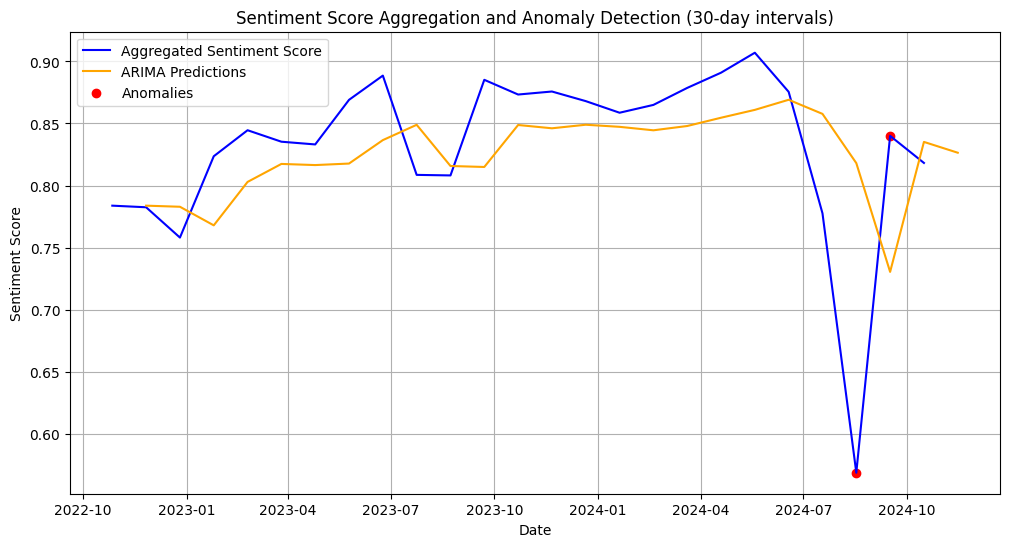

Standard deviation of average sentiment scores on anomaly dates: 0.19193326179408318


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 데이터 불러오기
file_path = "/content/drive/MyDrive/PML_PAPER/data/4_Sentiment_KBstar.csv"  # CSV 파일 경로
df = pd.read_csv(file_path)

# 컬럼 이름 정리 및 확인
df.columns = df.columns.str.strip()

# 날짜 데이터 처리
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # 날짜 형식 변환
else:
    df['date'] = pd.date_range(start='2022-10-27', periods=len(df), freq='D')  # 날짜 생성

df.sort_values('date', inplace=True)

# n일 단위로 sentiment_score 평균 계산
def aggregate_sentiment(data, n):
    data = data.set_index('date')  # 'date' 컬럼을 DatetimeIndex로 설정
    aggregated = data['sentiment_score'].resample(f'{n}D').mean()
    return aggregated

# n일 단위 설정 (예: 7일간 묶음)
n = 30
aggregated_scores = aggregate_sentiment(df, n)

# ARIMA 모델로 이상점 탐지
def detect_anomalies(data, order=(1, 1, 1)):
    model = ARIMA(data, order=order)
    fitted_model = model.fit()
    predictions = fitted_model.predict(start=1, end=len(data))

    # 잔차를 기반으로 이상치 판단
    residuals = data[1:] - predictions[1:]
    threshold = 1.5 * np.std(residuals)
    anomalies = residuals[abs(residuals) > threshold]
    return predictions, anomalies

predictions, anomalies = detect_anomalies(aggregated_scores)

# 이상치 날짜, 개수 및 리뷰 수 계산
anomaly_dates = anomalies.index
anomaly_review_counts = df[df['date'].isin(anomaly_dates)].groupby('date').size()

print(f"Number of anomaly dates: {len(anomaly_dates)}")
print("\nAnomaly dates and review counts:")
for date, count in anomaly_review_counts.items():
    print(f"{date.strftime('%Y-%m-%d')}: {count} reviews")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(aggregated_scores, label='Aggregated Sentiment Score', color='blue')
plt.plot(predictions, label='ARIMA Predictions', color='orange')
plt.scatter(anomalies.index, aggregated_scores[anomalies.index], color='red', label='Anomalies')
plt.title(f'Sentiment Score Aggregation and Anomaly Detection ({n}-day intervals)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid()
plt.show()

# Prepare the anomaly dates for saving to a file
anomaly_dates_list = anomaly_dates.strftime('%Y-%m-%d').tolist()

# Define file path for saving
output_file_path = "/content/drive/MyDrive/PML_PAPER/data/5_Anomaly_Dates_KBstar.txt"

# Write the anomaly dates to the text file
with open(output_file_path, 'w') as f:
    for date in anomaly_dates_list:
        f.write(f"{date}\n")

# Return the list of anomaly dates
anomaly_dates_list

# 이상치 날짜들에 해당하는 평균 sentiment_score 값 추출
anomaly_avg_sentiment_scores = aggregated_scores[anomalies.index]

# 그 평균값들의 표준 편차를 계산합니다.
std_deviation_of_anomalies = anomaly_avg_sentiment_scores.std()

# 결과 출력
print(f"Standard deviation of average sentiment scores on anomaly dates: {std_deviation_of_anomalies}")


Number of anomaly dates: 102

Anomaly dates and review counts:


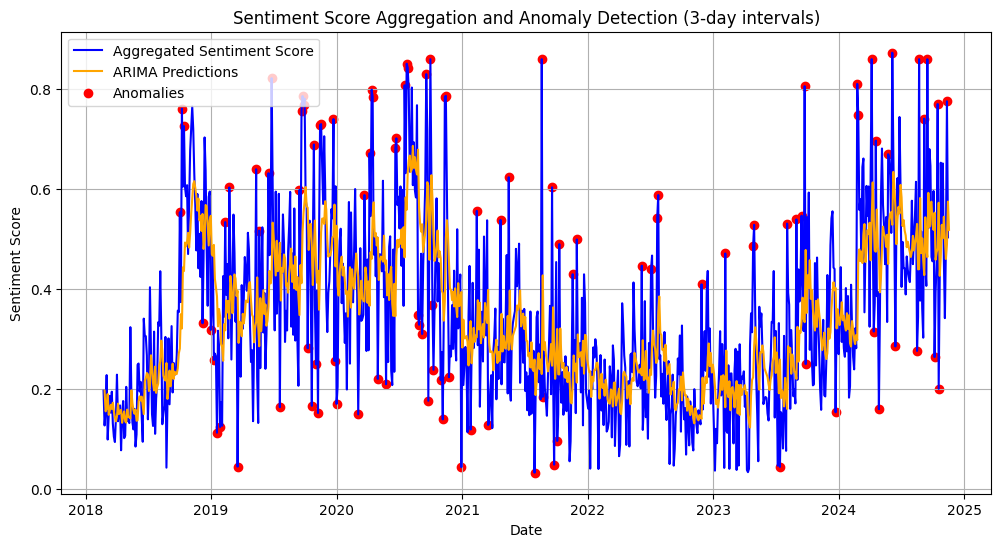

Standard deviation of average sentiment scores on anomaly dates: 0.2635751832900333


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 데이터 불러오기
file_path = "/content/drive/MyDrive/PML_PAPER/data/4_Sentiment_SolBank.csv"  # CSV 파일 경로
df = pd.read_csv(file_path)

# 컬럼 이름 정리 및 확인
df.columns = df.columns.str.strip()

# 날짜 데이터 처리
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # 날짜 형식 변환
else:
    df['date'] = pd.date_range(start='2022-10-27', periods=len(df), freq='D')  # 날짜 생성

df.sort_values('date', inplace=True)

# n일 단위로 sentiment_score 평균 계산
def aggregate_sentiment(data, n):
    data = data.set_index('date')  # 'date' 컬럼을 DatetimeIndex로 설정
    aggregated = data['sentiment_score'].resample(f'{n}D').mean()
    return aggregated

# n일 단위 설정 (예: 7일간 묶음)
n = 3
aggregated_scores = aggregate_sentiment(df, n)

# ARIMA 모델로 이상점 탐지
def detect_anomalies(data, order=(1, 1, 1)):
    model = ARIMA(data, order=order)
    fitted_model = model.fit()
    predictions = fitted_model.predict(start=1, end=len(data))

    # 잔차를 기반으로 이상치 판단
    residuals = data[1:] - predictions[1:]
    threshold = 1.5 * np.std(residuals)
    anomalies = residuals[abs(residuals) > threshold]
    return predictions, anomalies

predictions, anomalies = detect_anomalies(aggregated_scores)

# 이상치 날짜, 개수 및 리뷰 수 계산
anomaly_dates = anomalies.index
anomaly_review_counts = df[df['date'].isin(anomaly_dates)].groupby('date').size()

print(f"Number of anomaly dates: {len(anomaly_dates)}")
print("\nAnomaly dates and review counts:")
for date, count in anomaly_review_counts.items():
    print(f"{date.strftime('%Y-%m-%d')}: {count} reviews")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(aggregated_scores, label='Aggregated Sentiment Score', color='blue')
plt.plot(predictions, label='ARIMA Predictions', color='orange')
plt.scatter(anomalies.index, aggregated_scores[anomalies.index], color='red', label='Anomalies')
plt.title(f'Sentiment Score Aggregation and Anomaly Detection ({n}-day intervals)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid()
plt.show()

# Prepare the anomaly dates for saving to a file
anomaly_dates_list = anomaly_dates.strftime('%Y-%m-%d').tolist()

# Define file path for saving
output_file_path = "/content/drive/MyDrive/PML_PAPER/data/5_Anomaly_Dates_KBstar.txt"

# Write the anomaly dates to the text file
with open(output_file_path, 'w') as f:
    for date in anomaly_dates_list:
        f.write(f"{date}\n")

# Return the list of anomaly dates
anomaly_dates_list

# 이상치 날짜들에 해당하는 평균 sentiment_score 값 추출
anomaly_avg_sentiment_scores = aggregated_scores[anomalies.index]

# 그 평균값들의 표준 편차를 계산합니다.
std_deviation_of_anomalies = anomaly_avg_sentiment_scores.std()

# 결과 출력
print(f"Standard deviation of average sentiment scores on anomaly dates: {std_deviation_of_anomalies}")


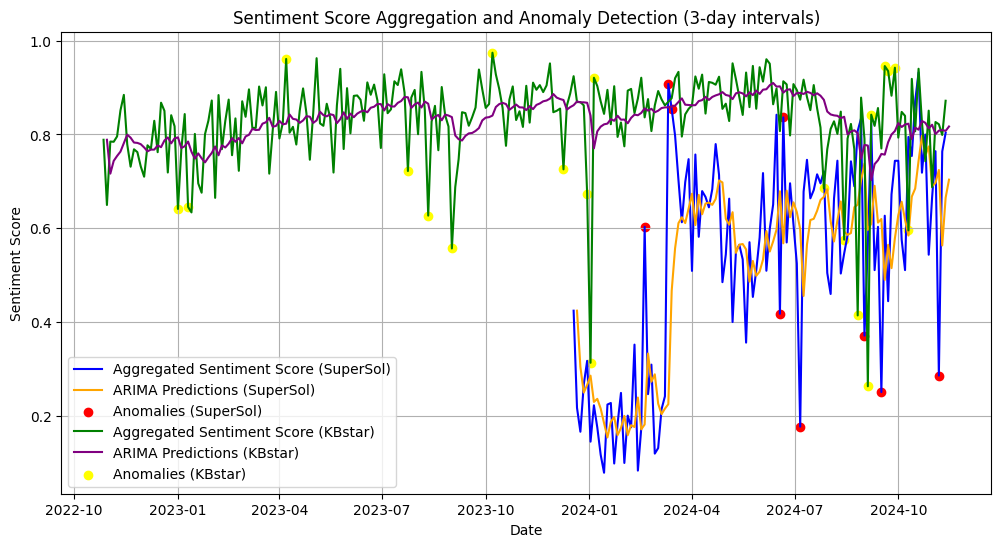

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 첫 번째 데이터셋 로드 (SuperSol)
file_path_1 = "/content/drive/MyDrive/PML_PAPER/data/4_Sentiment_SuperSol.csv"
df_1 = pd.read_csv(file_path_1)
df_1.columns = df_1.columns.str.strip()

if 'date' in df_1.columns:
    df_1['date'] = pd.to_datetime(df_1['date'], errors='coerce')
else:
    df_1['date'] = pd.date_range(start='2023-12-08', periods=len(df_1), freq='D')

df_1.sort_values('date', inplace=True)

# 12월 18일 이후 데이터 필터링
filter_date = pd.Timestamp('2023-12-18')
df_1 = df_1[df_1['date'] >= filter_date]

# Sentiment Score Aggregation 함수
def aggregate_sentiment(data, n):
    data = data.set_index('date')
    return data['sentiment_score'].resample(f'{n}D').mean()

# SuperSol: 3일 단위로 평균 계산
n = 3
aggregated_scores_1 = aggregate_sentiment(df_1, n)

# ARIMA 모델로 이상점 탐지
def detect_anomalies(data, order=(1, 1, 1)):
    model = ARIMA(data, order=order)
    fitted_model = model.fit()
    predictions = fitted_model.predict(start=1, end=len(data))
    residuals = data[1:] - predictions[1:]
    threshold = 1.5 * np.std(residuals)
    anomalies = residuals[abs(residuals) > threshold]
    return predictions, anomalies

predictions_1, anomalies_1 = detect_anomalies(aggregated_scores_1)

# 두 번째 데이터셋 로드 (KB Star Banking)
file_path_2 = "/content/drive/MyDrive/PML_PAPER/data/4_Sentiment_KBstar.csv"
df_2 = pd.read_csv(file_path_2)
df_2.columns = df_2.columns.str.strip()

if 'date' in df_2.columns:
    df_2['date'] = pd.to_datetime(df_2['date'], errors='coerce')
else:
    df_2['date'] = pd.date_range(start='2022-10-27', periods=len(df_2), freq='D')

df_2.sort_values('date', inplace=True)

# KB Star Banking: 3일 단위로 평균 계산
aggregated_scores_2 = aggregate_sentiment(df_2, n)
predictions_2, anomalies_2 = detect_anomalies(aggregated_scores_2)

# 그래프 겹쳐서 그리기
plt.figure(figsize=(12, 6))

# SuperSol 데이터셋
plt.plot(aggregated_scores_1, label='Aggregated Sentiment Score (SuperSol)', color='blue')
plt.plot(predictions_1, label='ARIMA Predictions (SuperSol)', color='orange')
plt.scatter(anomalies_1.index, aggregated_scores_1[anomalies_1.index], color='red', label='Anomalies (SuperSol)')

# KB Star Banking 데이터셋
plt.plot(aggregated_scores_2, label='Aggregated Sentiment Score (KBstar)', color='green')
plt.plot(predictions_2, label='ARIMA Predictions (KBstar)', color='purple')
plt.scatter(anomalies_2.index, aggregated_scores_2[anomalies_2.index], color='yellow', label='Anomalies (KBstar)')

plt.title(f'Sentiment Score Aggregation and Anomaly Detection (3-day intervals)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid()
plt.show()
